### Algorithm for the grouping of the data from the Medibio's ECG file set. 

###### written by Nicola Pastorello 19/0/2015

In [1]:
library('party')

Loading required package: grid
Loading required package: mvtnorm
Loading required package: modeltools
Loading required package: stats4
Loading required package: strucchange
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: sandwich


In [2]:
DF = read.csv('dataframe.csv')

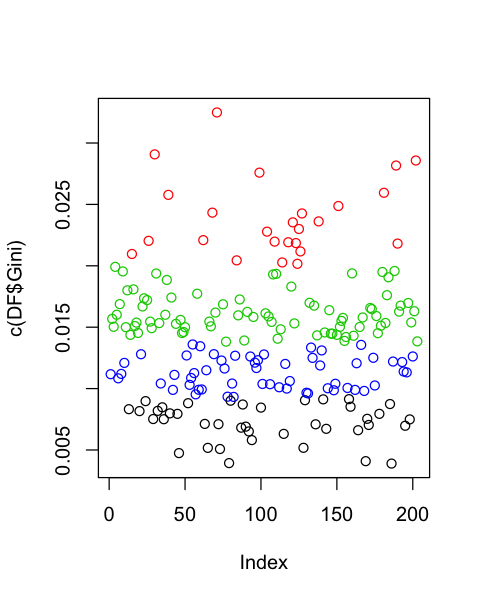

In [4]:
# K-mean clustering with Gini coefficient
nDF <- DF$Gini
kc_Gini <- kmeans(nDF, 4)
#table(DF$ID, kc$cluster)

options(repr.plot.width=4, repr.plot.height=5)
plot(c(DF$Gini), col=kc_Gini$cluster)

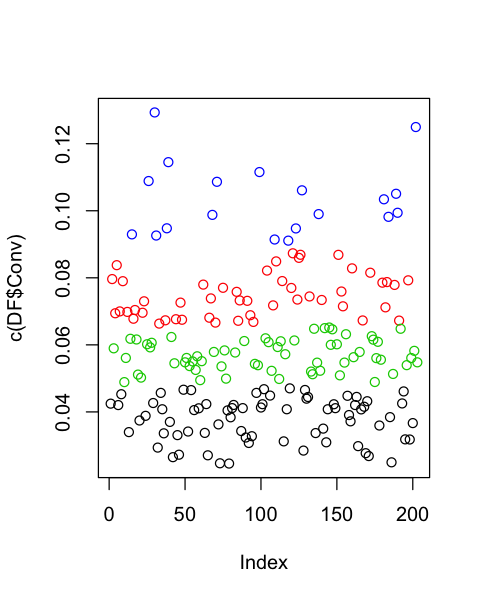

In [5]:
# K-mean clustering with Convolved std
nDF <- DF$Conv
kc_Gauss <- kmeans(nDF, 4)
#table(DF$ID, kc$cluster)
options(repr.plot.width=4, repr.plot.height=5)
plot(c(DF$Conv), col=kc_Gauss$cluster)

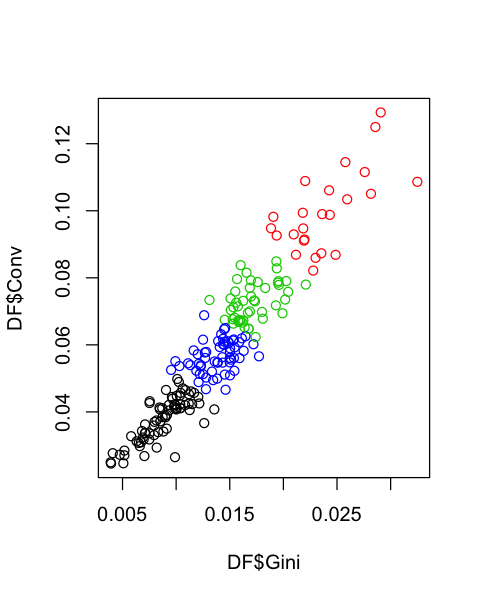

In [6]:
# K-mean clustering with both Gini and Convolved std
nDF <- DF
nDF$ID <- NULL
nDF$X <- NULL
nDF$GiniProf <- NULL
nDF$ConvProf <- NULL
nDF$Gini <- nDF$Gini*3
kc_Both <- kmeans(nDF, 4)
options(repr.plot.width=4, repr.plot.height=5)
plot(DF$Gini, DF$Conv, col=kc_Both$cluster)


In [6]:
(kc_Both)#(kc_Both$cluster)

K-means clustering with 4 clusters of sizes 24, 72, 47, 60

Cluster means:
        Conv       Gini
1 0.09977184 0.07162640
2 0.03784753 0.02622084
3 0.07269443 0.05134971
4 0.05656253 0.04156428

Clustering vector:
  [1] 2 3 4 3 3 2 3 2 3 4 4 3 2 4 1 3 3 4 4 2 4 3 3 2 4 1 4 4 2 1 1 2 3 2 2 2 3
 [38] 1 1 2 3 2 4 3 2 2 3 3 4 4 4 2 4 2 4 2 4 4 2 4 4 3 2 2 2 3 3 1 4 3 1 2 2 4
 [75] 3 4 4 2 2 2 2 2 4 3 3 3 2 2 4 2 3 2 4 2 3 4 2 4 1 2 2 4 4 1 4 2 4 3 1 3 4
[112] 2 4 3 2 4 2 1 2 3 1 4 1 3 1 1 1 2 2 2 2 3 4 4 3 2 4 1 4 3 2 4 2 2 3 4 4 2
[149] 2 4 1 4 3 3 4 4 2 2 2 3 4 2 2 2 4 2 3 2 2 2 2 3 4 4 2 4 4 2 4 3 1 3 3 1 2
[186] 2 4 3 1 1 3 3 2 2 2 4 3 2 4 2 4 1 4

Within cluster sum of squares by cluster:
[1] 0.005829574 0.005976632 0.002931895 0.002892512
 (between_SS / total_SS =  87.6 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

#### Clustering the rolling Gini whole profiles

In [7]:
# GiniProf = read.csv('rGiniprof.csv')
# trGiniProf = t(GiniProf) #Each column has the values of the profiles at the same time
# # colnames(trGiniProf) <- paste("Y",as.character(seq(1,459)), sep="")
load('matrix.Rdata') # Loads GiniProfMatrix

In [8]:
library('dtw')
# align <- dtw(GiniProfMatrix[3,1:459], GiniProfMatrix[4, 1:459], 
#             step=asymmetricP1, keep=T)
# dtwPlotTwoWay(align)

# Measuring the Dynamical Time Warping distance between all the time series.
subMatrix <- GiniProfMatrix[1:30,]
resultDTW <- dist(subMatrix, method='DTW')

#IT TAKES A LOT OF TIME!
#resultDTW <- dist(GiniProfMatrix, method='DTW')

# The output is a square matrix whose element [i,j] holds the Dynamic 
# Time Warp distance between row i (query) and j (reference) of the matrix
# i.e. dtw(mx[i,],my[j,])$distance.

save(resultDTW, file="DTWdistance.Rdata")

Loading required package: proxy

Attaching package: ‘proxy’

The following objects are masked from ‘package:stats’:

    as.dist, dist

The following object is masked from ‘package:base’:

    as.matrix

Loaded dtw v1.18-1. See ?dtw for help, citation("dtw") for use in publication.



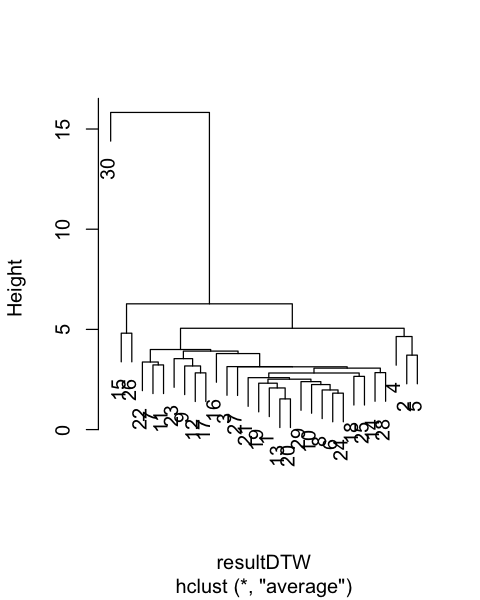

In [9]:
load("DTWdistance.Rdata")
# Hierarchical clustering of distances
hc <- hclust(resultDTW, method='average')

options(repr.plot.width=4, repr.plot.height=5)
plot(hc, main='')

ERROR: Error in hclust(distMatrix, method = "average"): object 'distMatrix' not found


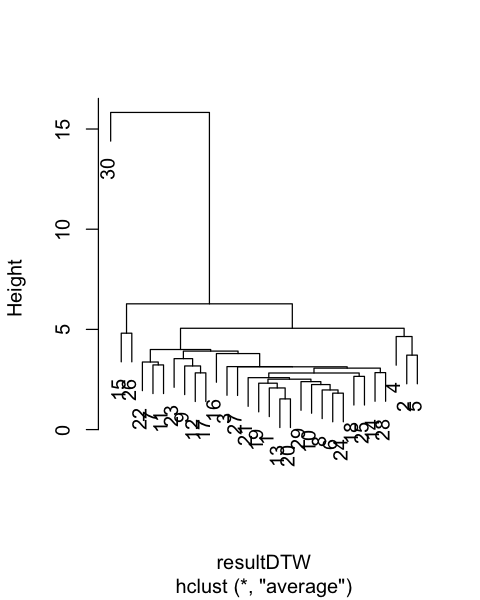

In [11]:
# hierarchical clustering with dtw distance
hc <- hclust(distMatrix, method='average')

options(repr.plot.width=4, repr.plot.height=5)
plot(hc, main='')

#### Clustering the rolling Gini whole profiles

pdf 
  2

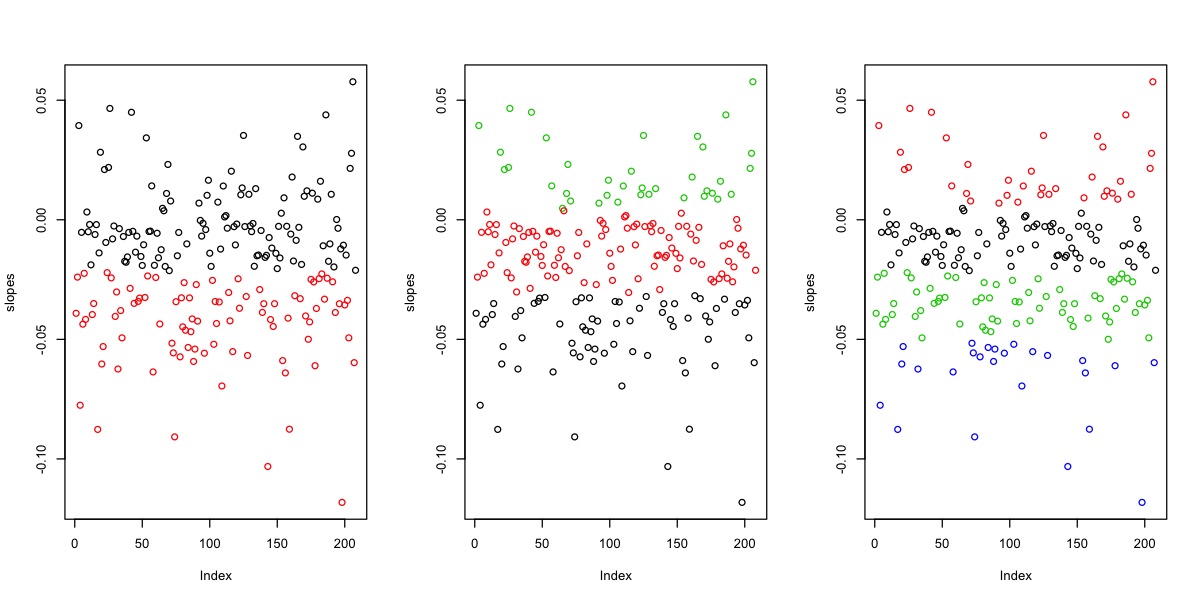

In [17]:

DF = read.csv('SleepSlopes.csv')
# K-mean clustering with both Gini and Convolved std
nDF <- DF
slopes <- nDF$X0
kc_2 <- kmeans(slopes, 2)
kc_3 <- kmeans(slopes, 3)
kc_4 <- kmeans(slopes, 4)

par(mfrow=c(1,3))
options(repr.plot.width=10, repr.plot.height=5)
plot(slopes, col=kc_2$cluster)
plot(slopes, col=kc_3$cluster)
plot(slopes, col=kc_4$cluster)

png(filename='k-mean_slope.png')
par(mfrow=c(1,3))
options(repr.plot.width=10, repr.plot.height=5)
plot(slopes, col=kc_2$cluster)
plot(slopes, col=kc_3$cluster)
plot(slopes, col=kc_4$cluster)

dev.off()

